# NLP_assignment01_01_课堂内容复现

## Build Graph
- 找出城市的名字和locatoin

In [5]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

### Get data from source using regular expression

In [6]:
import re

## regular expression

[a-z]
[A-Z]
[^a]: negation
colou?r:  ? zero or one of its previous character
```
* : zero or more of its previous character
+: one or more
.:match any single character
^:start of the line
$:end of the line
| [cat|dog] : cat or dog
(da): make the string da like a character
```


In [7]:
l = "color or colour， coloucer"

In [8]:
pattern = re.compile("colou?r")
pattern.findall(l)

['color', 'colour']

In [9]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [10]:
# name:'澳门', geoCoord:[113.54, 22.19]}
def get_city_info(city_coordination):
    city_location = {} # 存放城市和相应的经纬度
    for line in city_coordination.split('\n'):
        # 需要忽略的一些部分
        if line.startswith("//"):
            continue
        if line.strip() == "":
            continue
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location            

In [11]:
city_info = get_city_info(coordination_source)

In [12]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

### Compute distance between cities
- 网上查找的，因为地球是圆的，有专门的计算公式

In [13]:
import math
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d

In [14]:
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])
get_city_distance("杭州","上海")

153.5185697155768

### Draw the graph

In [17]:
import networkx as nx # networkx:用于结点画图
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams[F] = False

In [18]:
city_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

In [79]:
city_graph = nx.Graph()
# 添加城市结点
city_graph.add_nodes_from(list(city_info.keys()))  

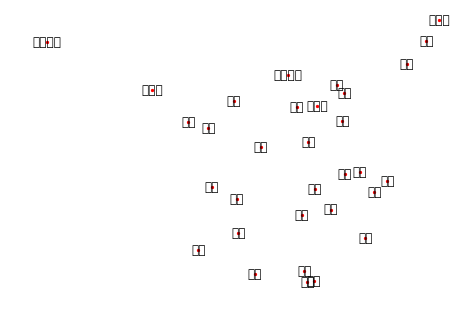

In [80]:
nx.draw(city_graph, city_info, with_labels=True, node_size=5)

* 疑问： 为什么城市名称没有显示出来

### Build connection between. Let's assume that two cities are connected if their distance is less than 700 km.

In [19]:
threshold = 700   # defined the threshold

In [20]:
from collections import defaultdict

In [21]:
# 小于阈值，建立相互之间的连接🔗
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    print(cities)
    for c1 in cities:
        for c2 in cities:
            if c1 == c2: continue
            if get_city_distance(c1, c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection

In [22]:
cities_connection = build_connection(city_info)

['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门']


In [23]:
cities_connection,

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

### Draw connection graph

In [24]:
cities_connection_graph = nx.Graph(cities_connection)

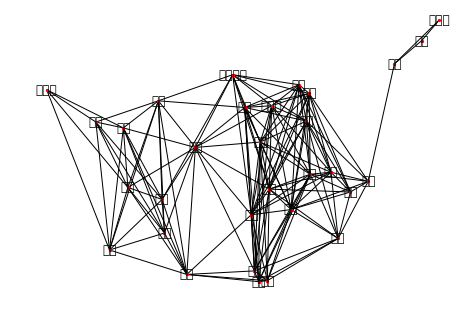

In [48]:
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=5)

### BFS 1 version

In [50]:
# 输入：城市关系图，字典形式，开始城市，结束城市
def search_1(graph,start,destination):
    pathes = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    
    while pathes:
        path = pathes.pop(0)  #提取第一条路径
        print("path", path)
        froniter = path[-1]   #提取即将要探索的节点
        print("froniter", froniter)
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
        # {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],    
        successsors = graph[froniter]
        
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+r[city]
            
            pathes.append(new_path)  #bfs     #将新路径加到list里面，bfs放在前面，dfs则是相反
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了
                return new_path
        visited.add(froniter)

In [51]:
search_1(cities_connection,"上海","香港")

path ['上海']
froniter 上海
path ['上海', '济南']
froniter 济南
path ['上海', '南京']
froniter 南京
path ['上海', '合肥']
froniter 合肥


['上海', '合肥', '香港']

### Optimal search using variation of BFS

In [52]:
def search_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    visited = set()# ！
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue#             
        if froniter == destination:# 放在前面检查，否则可能出现漏选现象
            return path# ！
        
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            
        pathes = search_strategy(pathes)
        print("pathes", pathes)
        visited.add(froniter) # ！
       # if pathes and (destination == pathes[0][-1]):
       #     return pathes[0]  
        

In [58]:
# 对城市之间距离进行排序，获取最短路径城市，从小到大排序
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        print("distance", distance)
        return distance
    return sorted(pathes,key=get_distance_of_path)

In [56]:
# 直接获取两个城市之间的距离
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance

In [59]:
get_distance_of_path(["北京","济南","上海"])

752.66259009181

In [60]:
get_distance_of_path(["北京","天津","上海"])

732.5085345714293

* lambda x:x 相当于就是DFS，没有使用路径距离优化

In [61]:
search_2(cities_connection,"北京","上海",search_strategy=lambda x:x)

pathes [['北京', '石家庄'], ['北京', '武汉'], ['北京', '郑州'], ['北京', '济南'], ['北京', '南京'], ['北京', '合肥'], ['北京', '杭州'], ['北京', '南昌'], ['北京', '长沙'], ['北京', '太原'], ['北京', '天津'], ['北京', '呼和浩特']]
pathes [['北京', '武汉'], ['北京', '郑州'], ['北京', '济南'], ['北京', '南京'], ['北京', '合肥'], ['北京', '杭州'], ['北京', '南昌'], ['北京', '长沙'], ['北京', '太原'], ['北京', '天津'], ['北京', '呼和浩特'], ['北京', '石家庄', '武汉'], ['北京', '石家庄', '郑州'], ['北京', '石家庄', '济南'], ['北京', '石家庄', '南京'], ['北京', '石家庄', '合肥'], ['北京', '石家庄', '南昌'], ['北京', '石家庄', '广州'], ['北京', '石家庄', '长沙'], ['北京', '石家庄', '太原'], ['北京', '石家庄', '西安'], ['北京', '石家庄', '天津'], ['北京', '石家庄', '呼和浩特']]
pathes [['北京', '郑州'], ['北京', '济南'], ['北京', '南京'], ['北京', '合肥'], ['北京', '杭州'], ['北京', '南昌'], ['北京', '长沙'], ['北京', '太原'], ['北京', '天津'], ['北京', '呼和浩特'], ['北京', '石家庄', '武汉'], ['北京', '石家庄', '郑州'], ['北京', '石家庄', '济南'], ['北京', '石家庄', '南京'], ['北京', '石家庄', '合肥'], ['北京', '石家庄', '南昌'], ['北京', '石家庄', '广州'], ['北京', '石家庄', '长沙'], ['北京', '石家庄', '太原'], ['北京', '石家庄', '西安'], ['北京', '石家庄', '天津'], ['北京', '石家庄', '呼和浩特'],

['北京', '济南', '上海']

In [62]:
search_2(cities_connection,"北京","上海",search_strategy=sort_by_distance)

distance 237.96793898073724
distance 507.1822625862953
distance 395.55476788861756
distance 174.19622349500776
distance 480.71771026391417
distance 414.5908069635816
distance 655.9367799584197
distance 554.2116951438225
distance 665.2271362574077
distance 447.0380076086443
distance 91.33650798815006
distance 536.3862585152772
pathes [['北京', '天津'], ['北京', '济南'], ['北京', '石家庄'], ['北京', '郑州'], ['北京', '合肥'], ['北京', '太原'], ['北京', '南京'], ['北京', '武汉'], ['北京', '呼和浩特'], ['北京', '南昌'], ['北京', '杭州'], ['北京', '长沙']]
distance 174.19622349500776
distance 237.96793898073724
distance 395.55476788861756
distance 414.5908069635816
distance 447.0380076086443
distance 480.71771026391417
distance 507.1822625862953
distance 536.3862585152772
distance 554.2116951438225
distance 655.9367799584197
distance 665.2271362574077
distance 398.43722358705924
distance 616.272157349062
distance 537.5738428960327
distance 218.90399287281144
distance 500.63703357286425
distance 461.1731228419497
distance 669.1778706525284
d

['北京', '天津', '上海']

# AI for NLP Lecture 1 Part 2

## Machine Learning

In [82]:
from sklearn.datasets import load_boston
import random

In [66]:
dataset = load_boston()

In [67]:
#dataset

In [68]:
x,y=dataset['data'],dataset['target']

In [92]:
name = dataset["feature_names"]

In [93]:
name

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [83]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [84]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [69]:
x.shape

(506, 13)

样本数量： 506， 特征数：13个

In [70]:
y.shape

(506,)

In [94]:
x[1].shape  # 属性值 
x[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [86]:
dataset.feature_names
# CRIM     per capita crime rate by town\n 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [73]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [90]:
X_rm = x[:,5] # 为了方便，取用了前5个特征值
print(X_rm)

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.8

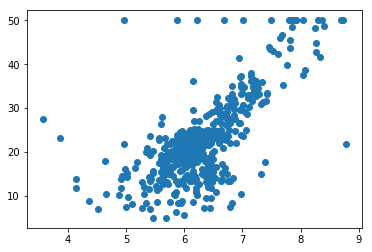

In [91]:
# plot the RM with respect to y
plt.scatter(X_rm,y)

### Gradient descent

### Assume that the target funciton is a linear function
$$ y = k*rm + b$$

In [96]:
# 定义目标函数
def price(rm, k, b):
    return k * rm + b

### Define mean square loss
- 平均平方误差

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

In [98]:
# 定义损失函数
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

### Define partial derivatives

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$


In [108]:
# 求解关于k的偏导数
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [109]:
# 求解关于b的偏导数
def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i-y_hat_i) 
    return -2/n * gradient

In [113]:
k = random.random()*200 - 100

In [127]:
k

7.130262638904554

In [130]:
# 参数初始化
k = random.random() * 200 - 100 
b = random.random() * 200 - 100
learning_rate = 1e-3
iteration_num = 200
losses = []
for i in range(iteration_num):
    price_use_current_parameters = [price(r, k, b) for r in X_rm]
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i, current_loss, k, b))
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 14528.115688691365, parameters k is -8.137327708440552 and b is -46.06881548960797
Iteration 1, the loss is 12251.395591987797, parameters k is -6.6152738761804075 and b is -45.8293319869053
Iteration 2, the loss is 10332.559147429782, parameters k is -5.217961985943083 and b is -45.609458554915285
Iteration 3, the loss is 8715.349676362192, parameters k is -3.9351688614578215 and b is -45.40758805849973
Iteration 4, the loss is 7352.353636368089, parameters k is -2.757509162796026 and b is -45.222245074640995
Iteration 5, the loss is 6203.610545274132, parameters k is -1.676366721827314 and b is -45.0520750980276
Iteration 6, the loss is 5235.441414881566, parameters k is -0.6838315050509458 and b is -44.895834631291706
Iteration 7, the loss is 4419.461346300224, parameters k is 0.2273582573866847 and b is -44.75238208739731
Iteration 8, the loss is 3731.7473380357737, parameters k is 1.063869199881222 and b is -44.62066943761953
Iteration 9, the loss is 3152.

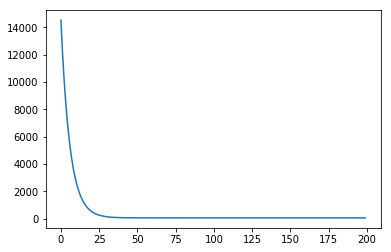

In [132]:
plt.plot(list(range(iteration_num)), losses)

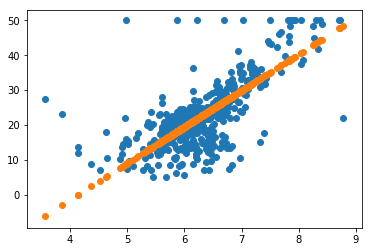

In [133]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]
plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)